### 0. Loading the iris dataset

In [1]:
from sklearn import datasets
import math

iris = datasets.load_iris()
X = iris.data
Y = iris.target

#### 1. FCM

In [2]:
import random as rd
import numpy as np

class FCM:
    def __init__(self,X,c,m,m_iter):
        self.m = m
        self.c = c
        self.p = X.shape[1]
        self.m_iter = m_iter
        minX = [min(X[:,i]) for i in range(self.p)]
        maxX = [max(X[:,i]) for i in range(self.p)]
        self.V = np.array([ [rd.uniform(minX[j],maxX[j]) for j in range(self.p)] for i in range(self.c) ])
        self.U = []
        self.Etqt = []
        self.t_er = []
        self.accr = []
        self.entrp = []
        self.pc = []
        self.accr = []
        
    def calculerU(self, X):
        alpha = -1./(self.m-1.)
        term1 = [ [ pow(sum(np.square(X[k]-self.V[i])), alpha) for k in range(X.shape[0]) ] for i in range(self.c)]
        term2 = [ sum([pow(sum(np.square(X[k]-self.V[i])), alpha) for i in range(self.c)]) for k in range(X.shape[0])]
        self.U = [ [ term1[i][k]/term2[k] for k in range(X.shape[0])] for i in range(self.c)]
        
    def calculerV(self, X):
        card = [ sum([pow(self.U[i][k], self.m) for k in range(X.shape[0])]) for i in range(self.c)]
        #print(sum(card)) #à cause de la puissance m, la somme est différente de n
        term = [ [ sum([ pow(self.U[i][k], self.m)*X[k][j] for k in range(X.shape[0])]) for j in range(self.p)] for i in range(self.c)]
        self.V = [ [ term[i][j]/card[i] for j in range(self.p)] for i in range(self.c)]
    
    def etiqueterV(self, X,Y):
        card = [0 for i in range(self.c)]
        Vmoy = [ [ 0. for j in range(self.p)] for i in range(self.c)]
        for k in range(X.shape[0]):
            for j in range(self.p):
                Vmoy[Y[k]][j] = Vmoy[Y[k]][j] + X[k][j]
        for k in range(X.shape[0]):
            card[Y[k]] = card[Y[k]] + 1
        for i in range(self.c):
            for j in range(self.p):
                Vmoy[i][j] = Vmoy[i][j] / card[Y[k]]
        Vmoy = np.array(Vmoy)
        #print("Vmoy = \n"+str(np.array(Vmoy)))
        dist = [[sum(np.square(self.V[l]-Vmoy[i])) for i in range(self.c)] for l in range(self.c)]
        etqt = [np.argmin(dist[i]) for i in range(self.c)]
        self.Etqt = etqt
    
    def classe(self,vect): 
        term1 = [ pow(sum(np.square(vect-self.V[i])), -1./(self.m-1)) for i in range(self.c)]
        term2 = sum([ pow(sum(np.square(vect-self.V[i])), -1./(self.m-1)) for i in range(self.c)])
        u = [term1[i]/term2 for i in range(self.c)]
        return self.Etqt[np.argmax(u)]
    
    def tauxErr(self, X, Y):
        er = 0.
        for k in range(X.shape[0]):
            if(self.classe(X[k]) != Y[k]):
                er = er + 1
        return er
    
    def accuracy(self,X,Y):
        T = 0
        for i in range(len(X)):
            if self.classe(X[i]) == Y[i]:
                T+=1
        return T/len(X)
    
    def pred(self,X):
        y = []
        for i in range(len(X)):
            y.append(self.classe(X[i]))
        return y
    
    def entropie(self):
        entr = 0
        for i in range(len(self.U[0])):
            for j in range(self.c):
                entr += self.U[j][i] * math.log2(self.U[j][i])
        entr = -1 * (entr / len(self.U[0]))
        return entr
    
    def PC(self):
        pc = 0
        for i in range(len(self.U[0])):
            for j in range(self.c):
                pc += pow(self.U[j][i],2)             
        pc = pc / len(self.U[0])
        return pc
    
    
    def entrainer(self, X,Y): # add epsilon
        t = 0
        while(t<self.m_iter):
            self.calculerU(X)
            self.calculerV(X)
            t = t + 1
            self.etiqueterV(X,Y)
            self.t_er.append(self.tauxErr(X, Y)*100./X.shape[0])
            self.accr.append(self.accuracy(X,Y))
            self.entrp.append(self.entropie())
            self.pc.append(self.PC())

In [3]:
fcm = FCM(X,3,2,10)
v_ini = fcm.V.copy()
fcm.entrainer(X,Y)
print(v_ini)
print(fcm.V)

[[5.50477284 3.4832709  1.33183257 1.08106768]
 [6.53114657 3.36232974 2.10386058 0.3576253 ]
 [5.30314671 4.06465414 6.30857141 1.5187774 ]]
[[5.003951314000226, 3.414490215115923, 1.4821700201459473, 0.2532559504399648], [5.880622595813835, 2.7580551043941495, 4.351883588497073, 1.3911237863122736], [6.765110087503964, 3.0494527203719737, 5.63432348464185, 2.0486359360353537]]


#### 1.1 Visualizing the results

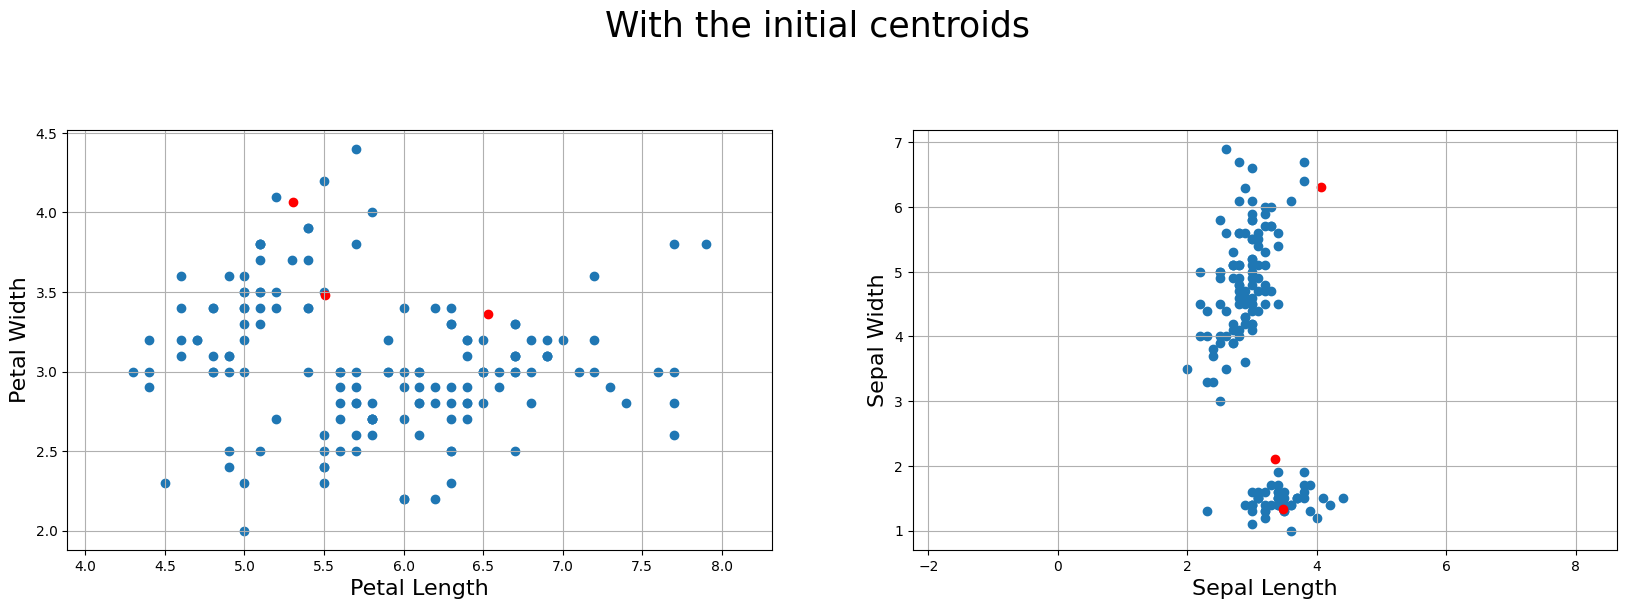

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 12))
def plotData(X,Y,C,i,z,titre):  
    plt.subplot(2,2,z+1)                                            
    plt.scatter(X,Y, marker='o')    
    for center in C:
        plt.scatter(center[i],center[i+1], marker='o',color='r')        
    plt.axis('equal')                                                                 
    plt.xlabel(titre+' Length', fontsize=16)                                                 
    plt.ylabel(titre+' Width', fontsize=16)                                                                                      
    plt.grid() 
    
    
plt.suptitle("With the initial centroids",fontsize=25)
titre = ["Petal","Sepal"]
for i in range(2):
    plotData(X[:,i],X[:,i+1],v_ini,i,i,titre[i])


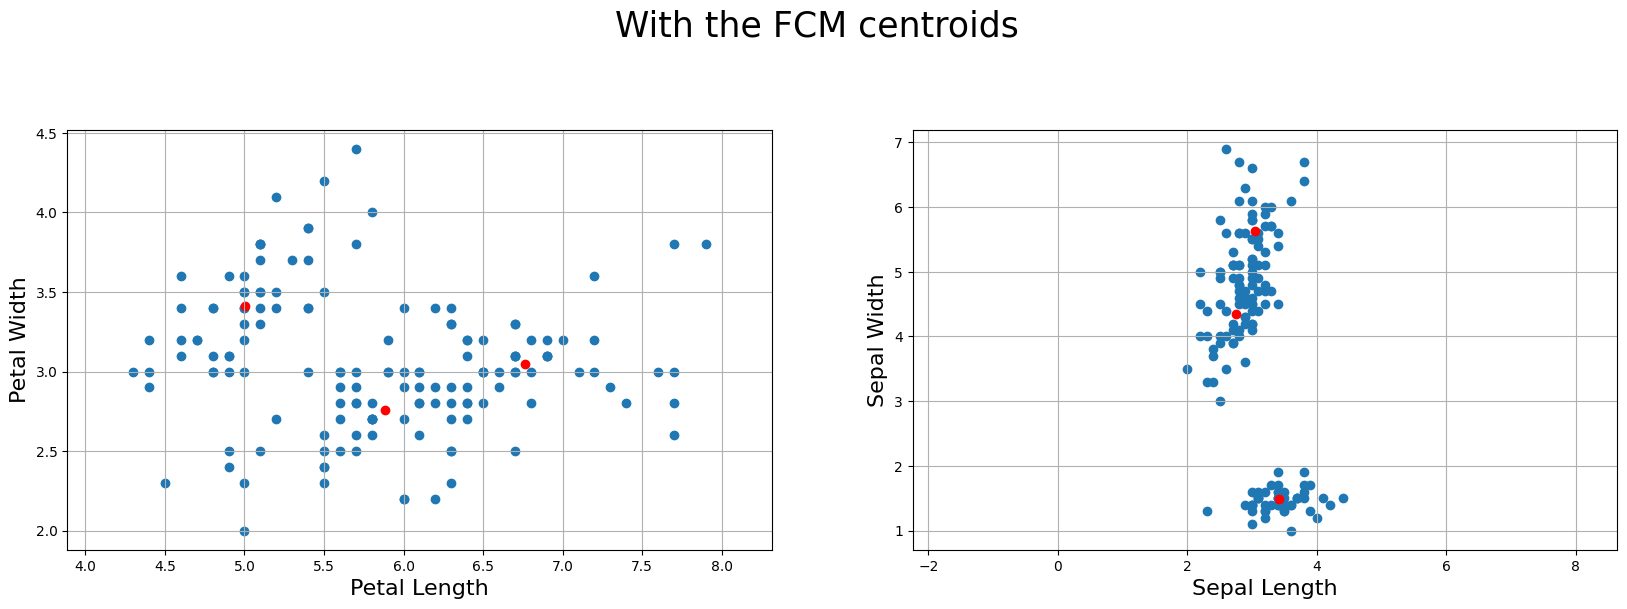

In [5]:
plt.figure(figsize=(20, 12))

plt.suptitle("With the FCM centroids",fontsize=25)
titre = ["Petal","Sepal"]
for i in range(2):
    plotData(X[:,i],X[:,i+1],fcm.V,i,i,titre[i])

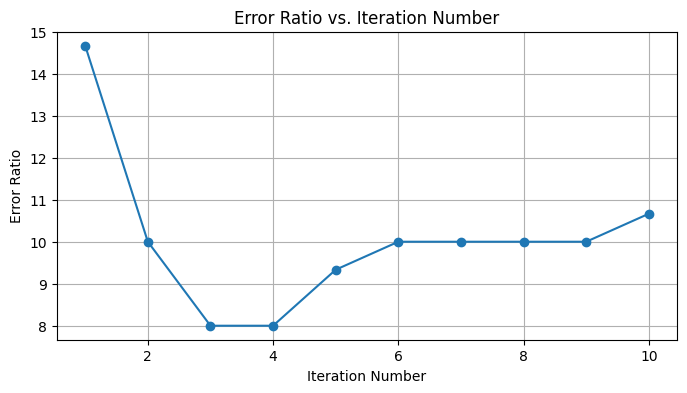

In [6]:
import matplotlib.pyplot as plt


error_ratios = fcm.t_er
num_iterations = [i for i in range(1, len(error_ratios)+1)]

plt.figure(figsize=(8, 4))
plt.plot(num_iterations, error_ratios, marker='o')
plt.title('Error Ratio vs. Iteration Number')
plt.xlabel('Iteration Number')
plt.ylabel('Error Ratio')
plt.grid(True)

plt.show()

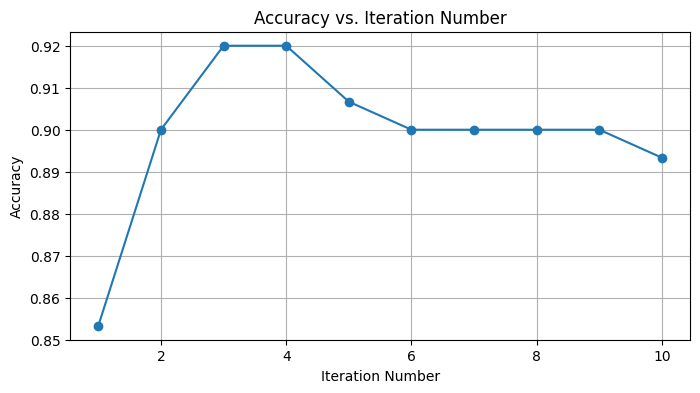

In [7]:

accuarcy_ratios = fcm.accr
num_iterations = [i for i in range(1, len(accuarcy_ratios)+1)]

plt.figure(figsize=(8, 4))
plt.plot(num_iterations, accuarcy_ratios, marker='o')
plt.title('Accuracy vs. Iteration Number')
plt.xlabel('Iteration Number')
plt.ylabel('Accuracy')
plt.grid(True)

plt.show()

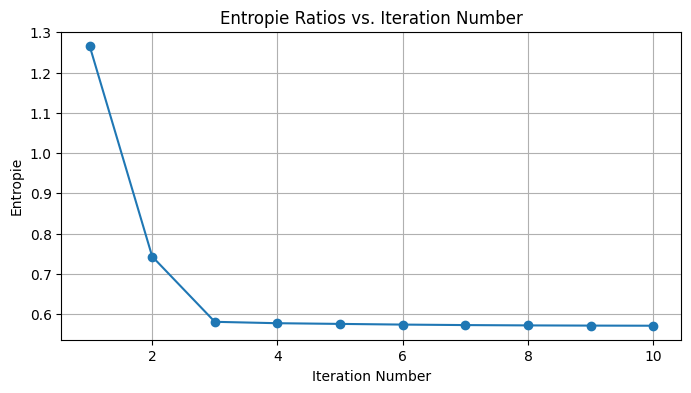

In [8]:

entrp_ratios = fcm.entrp
num_iterations = [i for i in range(1, len(entrp_ratios)+1)]

plt.figure(figsize=(8, 4))
plt.plot(num_iterations, entrp_ratios, marker='o')
plt.title('Entropie Ratios vs. Iteration Number')
plt.xlabel('Iteration Number')
plt.ylabel('Entropie')
plt.grid(True)

plt.show()

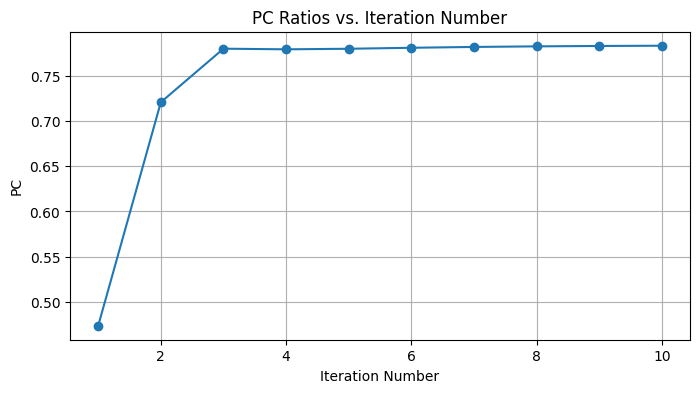

In [9]:

pc_ratios = fcm.pc
num_iterations = [i for i in range(1, len(pc_ratios)+1)]

plt.figure(figsize=(8, 4))
plt.plot(num_iterations, pc_ratios, marker='o')
plt.title('PC Ratios vs. Iteration Number')
plt.xlabel('Iteration Number')
plt.ylabel('PC')
plt.grid(True)

plt.show()

Confusion Matrix:
[[50  0  0]
 [ 0 47 13]
 [ 0  3 37]]


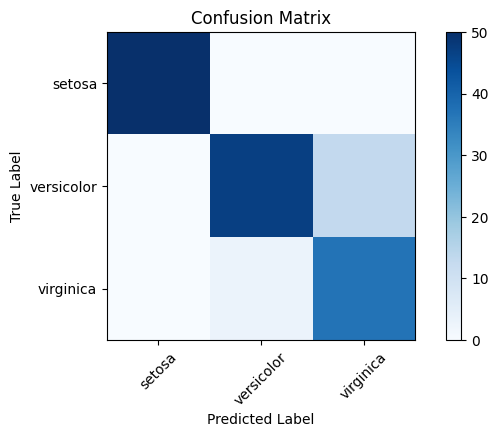

In [10]:
from sklearn.metrics import confusion_matrix
import numpy as np

fcm_predictions = np.array(fcm.pred(X))  
class_labels = ['setosa', 'versicolor', 'virginica']

conf_matrix = confusion_matrix( fcm_predictions,Y)

print('Confusion Matrix:')
print(conf_matrix)



plt.figure(figsize=(8, 4))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(len(class_labels)), class_labels, rotation=45)
plt.yticks(np.arange(len(class_labels)), class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


### 2. LVQ

In [11]:
class LVQ:
    def __init__(self,X,C,m_iter,lr):
        self.lr = lr
        self.C = C
        self.m_iter = m_iter
        self.p = len(X[0])
        minX = [min(X[:,i]) for i in range(self.p)]
        maxX = [max(X[:,i]) for i in range(self.p)]
        self.V = np.array([ [rd.uniform(minX[j],maxX[j]) for j in range(self.p)] for i in range(self.C) ])
        self.Etqt = []
        self.t_er = []
        self.accr = []
        
    def winner(self,X):
        X = np.array(X)
        dist = [ np.square(sum(X - self.V[j])) for j in range(self.C)]
        return int( np.argmin(dist))
    
    def etiquterV(self,X,Y):
        card = [0 for i in range(self.C)]
        Vmoy = [ [ 0. for j in range(self.p)] for i in range(self.C)]
        for k in range(X.shape[0]):
            for j in range(self.p):
                Vmoy[Y[k]][j] = Vmoy[Y[k]][j] + X[k][j]
        for k in range(X.shape[0]):
            card[Y[k]] = card[Y[k]] + 1
        for i in range(self.C):
            for j in range(self.p):
                Vmoy[i][j] = Vmoy[i][j] / card[Y[k]]
        Vmoy = np.array(Vmoy)
        #print("Vmoy = \n"+str(np.array(Vmoy)))
        dist = [[sum(np.square(self.V[l]-Vmoy[i])) for i in range(self.C)] for l in range(self.C)]
        etqt = [np.argmin(dist[i]) for i in range(self.C)]
        self.Etqt = etqt
    
    def classe(self,X):
        dist = [ np.array(sum(np.square(self.V[j] - X))) for j in range(self.C)] 
        return self.Etqt[np.argmin(dist)]

    def ajuster(self,X,Y):
        
        for t in range(self.m_iter):
            for i in range(len(X)):
                W = self.winner(X[i])
                self.V[W] = self.V[W] + self.lr * (X[i] - self.V[W])
                self.etiquterV(X,Y)
            self.t_er.append(self.tauxErr(X, Y)*100./X.shape[0])
            self.accr.append(self.accuracy(X,Y))

    def tauxErr(self, X, Y):
        er = 0.
        for k in range(X.shape[0]):
            if(self.classe(X[k]) != Y[k]):
                er = er + 1
        return er
    def accuracy(self,X,Y):
        T = 0
        for i in range(len(X)):
            if self.classe(X[i]) == Y[i]:
                T+=1
        return T/len(X)
    def pred(self,X):
        y = []
        for i in range(len(X)):
            y.append(self.classe(X[i]))
        return y

In [12]:
lvq = LVQ(X,3,10,0.01)
V_initiale = lvq.V.copy()
print(V_initiale)
lvq.winner(X[140])
lvq.ajuster(X,Y)
print(lvq.V)


[[6.50371352 3.97628243 6.342579   0.32348882]
 [4.40863877 2.48757485 4.67156734 1.45425415]
 [7.07317326 2.38115387 2.67838973 0.80003085]]
[[6.77959683 3.07649388 5.60629053 2.0312734 ]
 [5.87843387 2.73804627 4.469506   1.4456354 ]
 [5.01239354 3.3151753  1.6378781  0.32274906]]


#### 2.1 Visualizing the results

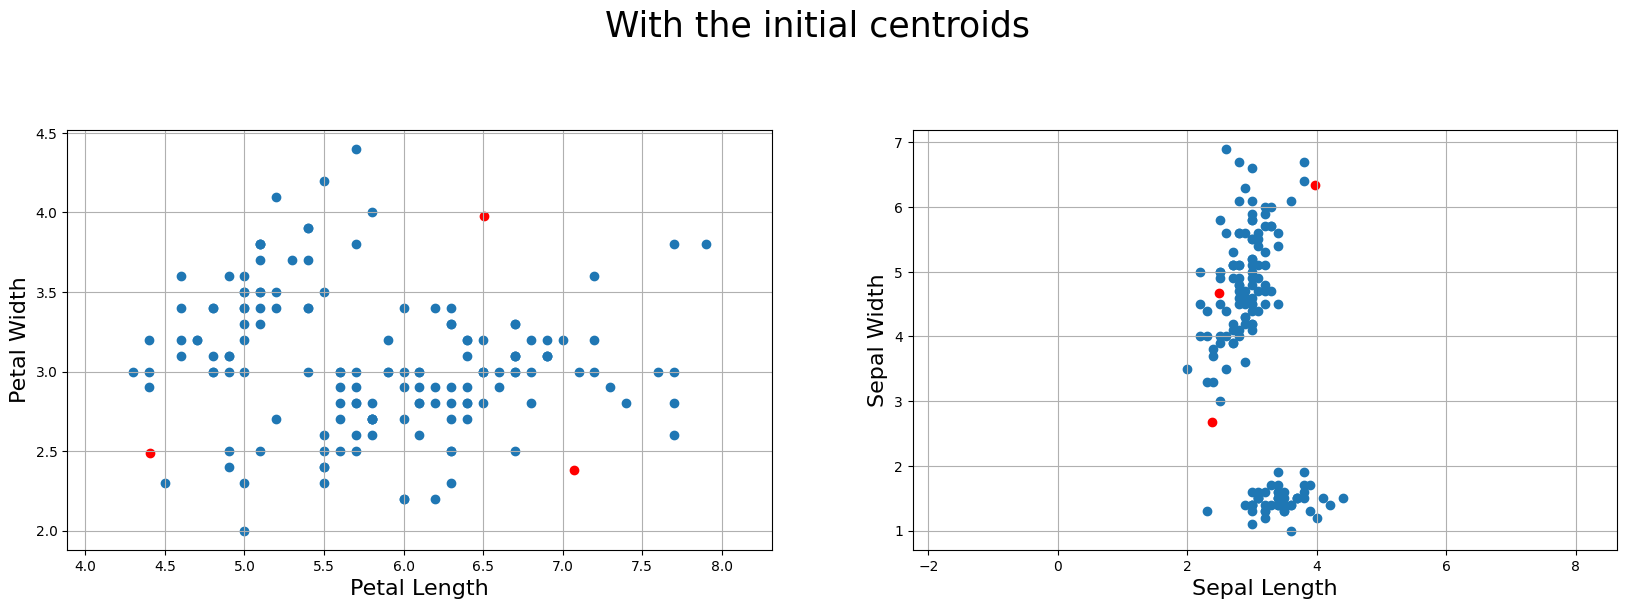

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 12))
def plotData(X,Y,C,i,z,titre):  
    plt.subplot(2,2,z+1)                                            
    plt.scatter(X,Y, marker='o')    
    for center in C:
        plt.scatter(center[i],center[i+1], marker='o',color='r')        
    plt.axis('equal')                                                                 
    plt.xlabel(titre+' Length', fontsize=16)                                                 
    plt.ylabel(titre+' Width', fontsize=16)                                                                                      
    plt.grid() 
    
    
plt.suptitle("With the initial centroids",fontsize=25)
titre = ["Petal","Sepal"]
for i in range(2):
    plotData(X[:,i],X[:,i+1],V_initiale,i,i,titre[i])
    


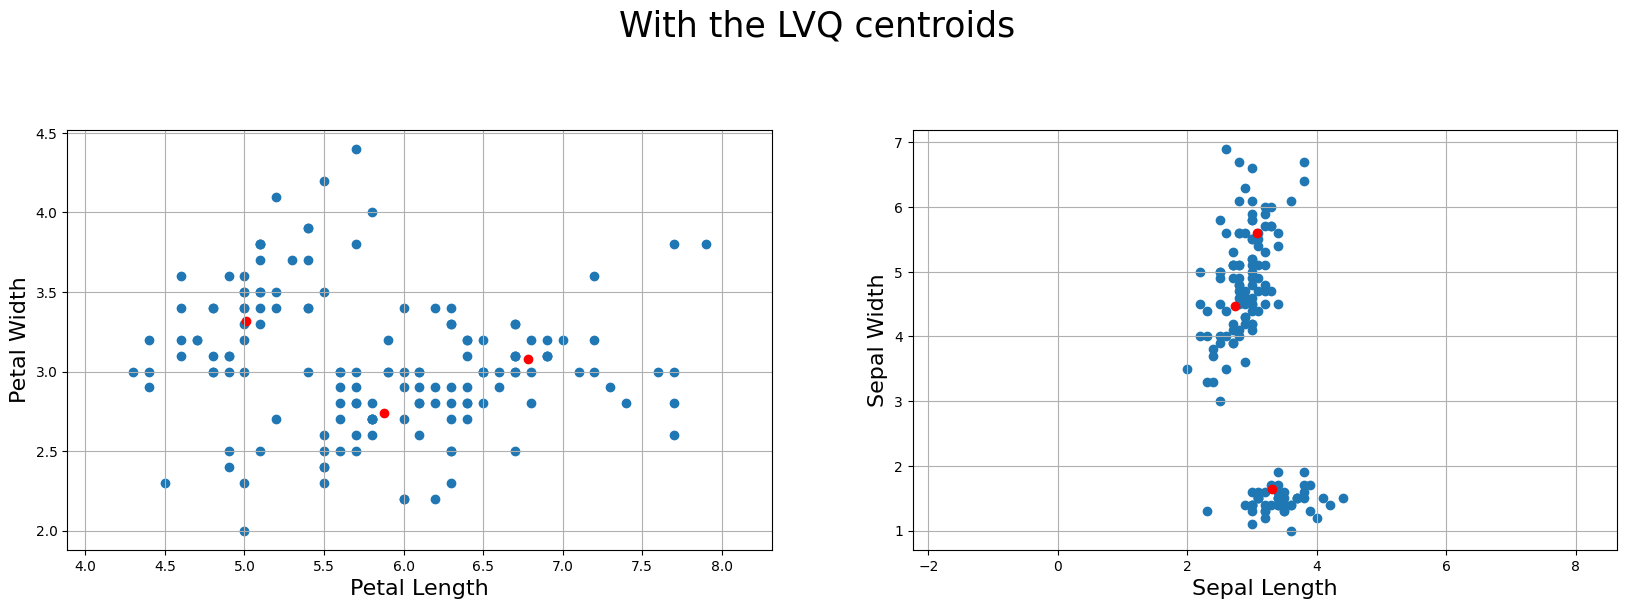

In [14]:
plt.figure(figsize=(20, 12))

plt.suptitle("With the LVQ centroids",fontsize=25)
titre = ["Petal","Sepal"]
for i in range(2):
    plotData(X[:,i],X[:,i+1],lvq.V,i,i,titre[i])

#### 2.2 Evaluating the performance

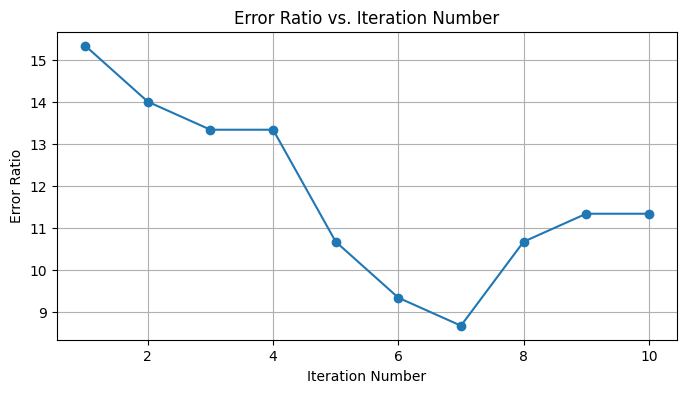

In [15]:
import matplotlib.pyplot as plt


error_ratios = lvq.t_er
num_iterations = [i for i in range(1, len(error_ratios)+1)]

plt.figure(figsize=(8, 4))
plt.plot(num_iterations, error_ratios, marker='o')
plt.title('Error Ratio vs. Iteration Number')
plt.xlabel('Iteration Number')
plt.ylabel('Error Ratio')
plt.grid(True)

plt.show()


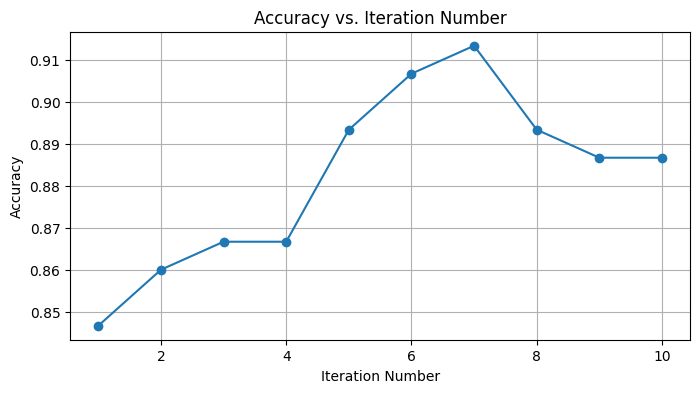

In [16]:

accuarcy_ratios = lvq.accr
num_iterations = [i for i in range(1, len(accuarcy_ratios)+1)]

plt.figure(figsize=(8, 4))
plt.plot(num_iterations, accuarcy_ratios, marker='o')
plt.title('Accuracy vs. Iteration Number')
plt.xlabel('Iteration Number')
plt.ylabel('Accuracy')
plt.grid(True)

plt.show()

Confusion Matrix:
[[50  0  0]
 [ 0 47  3]
 [ 0 14 36]]


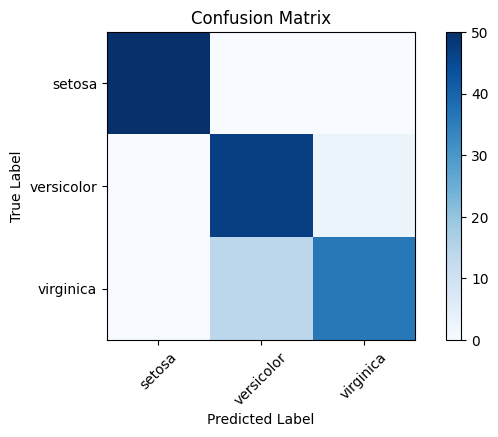

In [17]:
from sklearn.metrics import confusion_matrix
import numpy as np

lvq_predictions = np.array(lvq.pred(X))  
class_labels = ['setosa', 'versicolor', 'virginica']

conf_matrix = confusion_matrix(Y, lvq_predictions)

print('Confusion Matrix:')
print(conf_matrix)



plt.figure(figsize=(8, 4))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(len(class_labels)), class_labels, rotation=45)
plt.yticks(np.arange(len(class_labels)), class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


### 3. FLVQ

In [18]:
class FLVQ:
    def __init__(self,X,C,m ,m_iter,lr):
        self.lr = lr
        self.C = C
        self.m = m
        self.m_iter = m_iter
        self.p = len(X[0])
        minX = [min(X[:,i]) for i in range(self.p)]
        maxX = [max(X[:,i]) for i in range(self.p)]
        self.V = np.array([ [rd.uniform(minX[j],maxX[j]) for j in range(self.p)] for i in range(self.C) ])
        self.Etqt = []
        self.t_er = []
        self.accr = []
        self.U = []
        self.entrp = []
        self.pc = []
        

    
    def calculerU(self, X):
        alpha = -1./(self.m-1.)
        term1 = [ [ pow(sum(np.square(X[k]-self.V[i])), alpha) for k in range(X.shape[0]) ] for i in range(self.C)]
        term2 = [ sum([pow(sum(np.square(X[k]-self.V[i])), alpha) for i in range(self.C)]) for k in range(X.shape[0])]
        self.U = [ [ term1[i][k]/term2[k] for k in range(X.shape[0])] for i in range(self.C)]
        
    def etiquterV(self,X,Y):
        card = [0 for i in range(self.C)]
        Vmoy = [ [ 0. for j in range(self.p)] for i in range(self.C)]
        for k in range(X.shape[0]):
            for j in range(self.p):
                Vmoy[Y[k]][j] = Vmoy[Y[k]][j] + X[k][j]
        for k in range(X.shape[0]):
            card[Y[k]] = card[Y[k]] + 1
        for i in range(self.C):
            for j in range(self.p):
                Vmoy[i][j] = Vmoy[i][j] / card[Y[k]]
        Vmoy = np.array(Vmoy)
        #print("Vmoy = \n"+str(np.array(Vmoy)))
        dist = [[sum(np.square(self.V[l]-Vmoy[i])) for i in range(self.C)] for l in range(self.C)]
        etqt = [np.argmin(dist[i]) for i in range(self.C)]
        self.Etqt = etqt
    
    def classe(self,X):
        dist = [ np.array(sum(np.square(self.V[j] - X))) for j in range(self.C)] 
        return self.Etqt[np.argmin(dist)]

    def ajuster(self,X,Y):
        
        for t in range(self.m_iter):
            for i in range(len(X)):
                self.calculerU(X)
                for j in range(self.C):
                    self.V[j] = self.V[j] + self.lr * (X[i] - self.V[j]) * pow(self.U[j][i],self.m)
                self.etiquterV(X,Y)
            self.t_er.append(self.tauxErr(X, Y)*100./X.shape[0])
            self.accr.append(self.accuracy(X,Y))
            self.entrp.append(self.entropie())
            self.pc.append(self.PC())

    def tauxErr(self, X, Y):
        er = 0.
        for k in range(X.shape[0]):
            if(self.classe(X[k]) != Y[k]):
                er = er + 1
        return er
    def accuracy(self,X,Y):
        T = 0
        for i in range(len(X)):
            if self.classe(X[i]) == Y[i]:
                T+=1
        return T/len(X)
    def pred(self,X):
        y = []
        for i in range(len(X)):
            y.append(self.classe(X[i]))
        return y
    
    def entropie(self):
        entr = 0
        for i in range(len(self.U[0])):
            for j in range(self.C):
                entr += self.U[j][i] * math.log2(self.U[j][i])
        entr = -1 * (entr / len(self.U[0]))
        return entr
    
    def PC(self):
        pc = 0
        for i in range(len(self.U[0])):
            for j in range(self.C):
                pc += pow(self.U[j][i],2)             
        pc = pc / len(self.U[0])
        return pc

In [19]:
flvq = FLVQ(X,3,2,10,0.01)
FV_initiale = flvq.V.copy()
print(V_initiale)
flvq.ajuster(X,Y)
print(flvq.V)

[[6.50371352 3.97628243 6.342579   0.32348882]
 [4.40863877 2.48757485 4.67156734 1.45425415]
 [7.07317326 2.38115387 2.67838973 0.80003085]]
[[4.99795428 3.4116743  1.50542424 0.26650363]
 [5.95627502 2.81238144 4.50878418 1.50271296]
 [7.0257392  3.26000618 5.84191216 1.80889176]]


#### 3.1 Visualizing the results

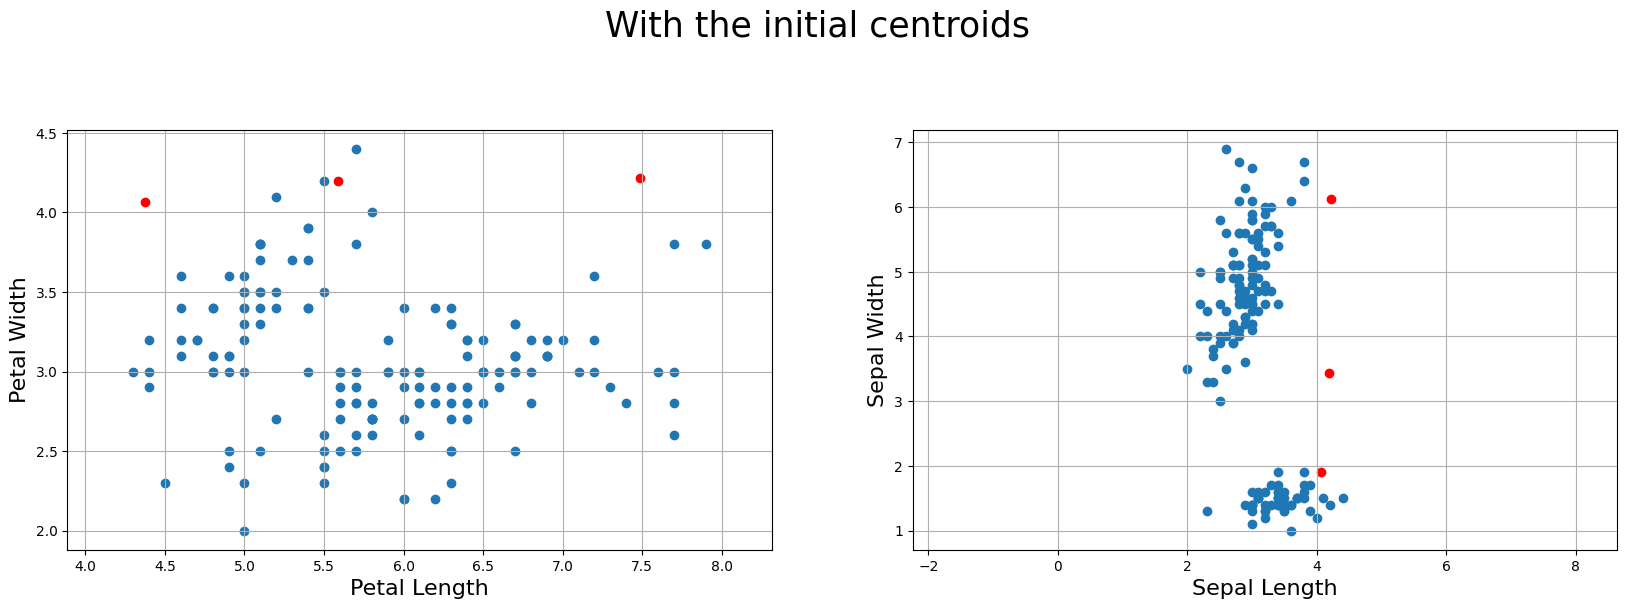

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 12))
def plotData(X,Y,C,i,z,titre):  
    plt.subplot(2,2,z+1)                                            
    plt.scatter(X,Y, marker='o')    
    for center in C:
        plt.scatter(center[i],center[i+1], marker='o',color='r')        
    plt.axis('equal')                                                                 
    plt.xlabel(titre+' Length', fontsize=16)                                                 
    plt.ylabel(titre+' Width', fontsize=16)                                                                                      
    plt.grid() 
    
    
plt.suptitle("With the initial centroids",fontsize=25)
titre = ["Petal","Sepal"]
for i in range(2):
    plotData(X[:,i],X[:,i+1],FV_initiale,i,i,titre[i])


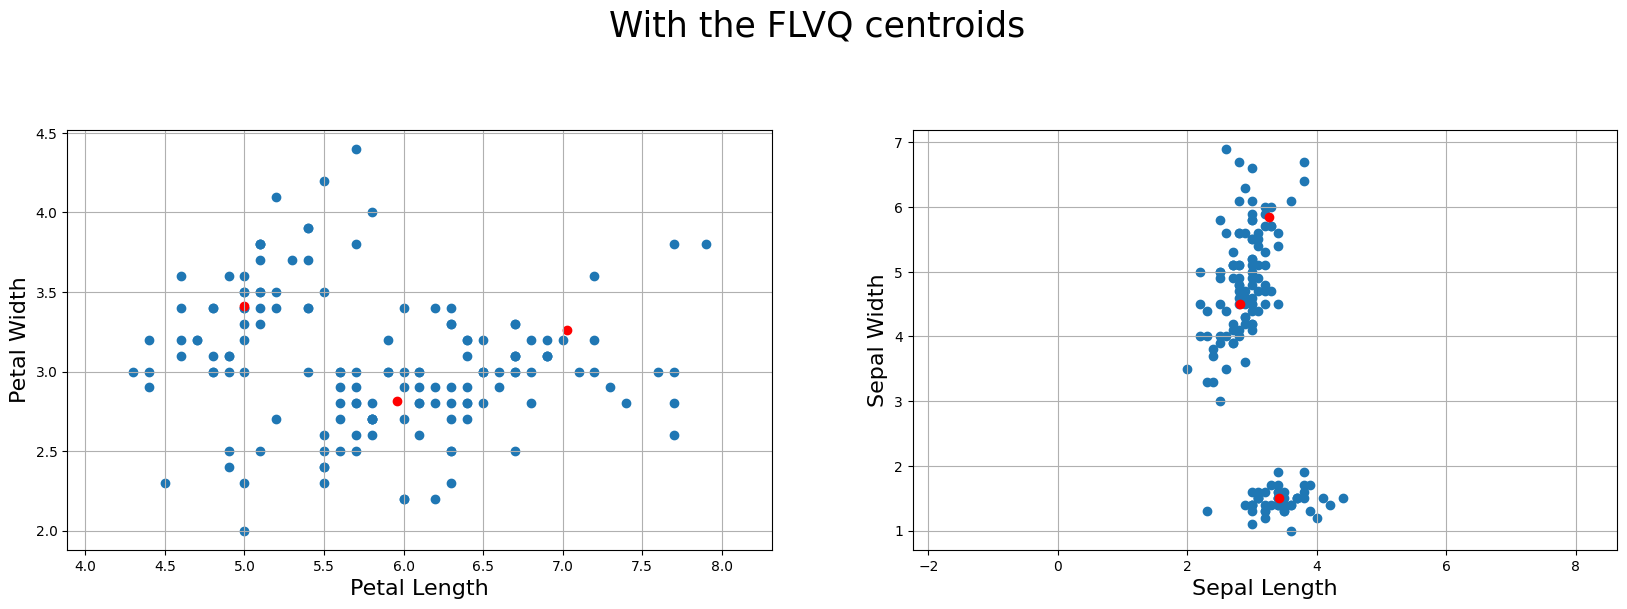

In [21]:
plt.figure(figsize=(20, 12))

plt.suptitle("With the FLVQ centroids",fontsize=25)
titre = ["Petal","Sepal"]
for i in range(2):
    plotData(X[:,i],X[:,i+1],flvq.V,i,i,titre[i])

#### 3.2 Evaluating the performance

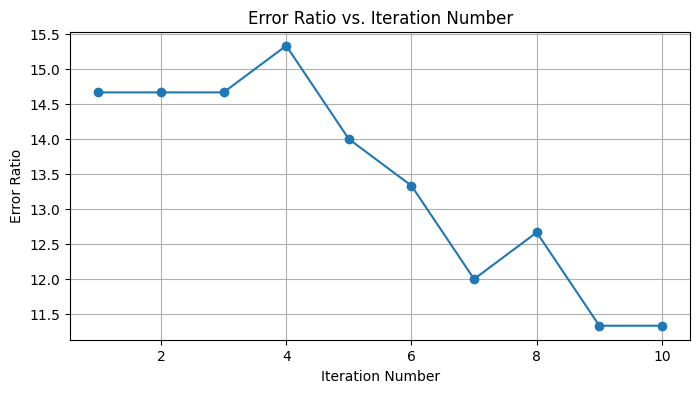

In [22]:
import matplotlib.pyplot as plt


error_ratios = flvq.t_er
num_iterations = [i for i in range(1, len(error_ratios)+1)]

plt.figure(figsize=(8, 4))
plt.plot(num_iterations, error_ratios, marker='o')
plt.title('Error Ratio vs. Iteration Number')
plt.xlabel('Iteration Number')
plt.ylabel('Error Ratio')
plt.grid(True)

plt.show()

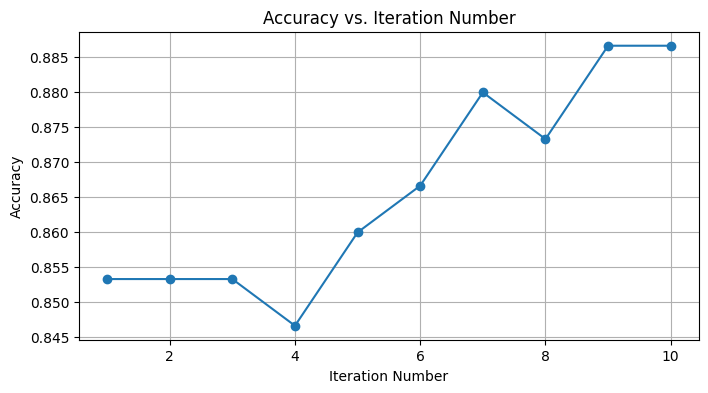

In [23]:

accuarcy_ratios = flvq.accr
num_iterations = [i for i in range(1, len(accuarcy_ratios)+1)]

plt.figure(figsize=(8, 4))
plt.plot(num_iterations, accuarcy_ratios, marker='o')
plt.title('Accuracy vs. Iteration Number')
plt.xlabel('Iteration Number')
plt.ylabel('Accuracy')
plt.grid(True)

plt.show()

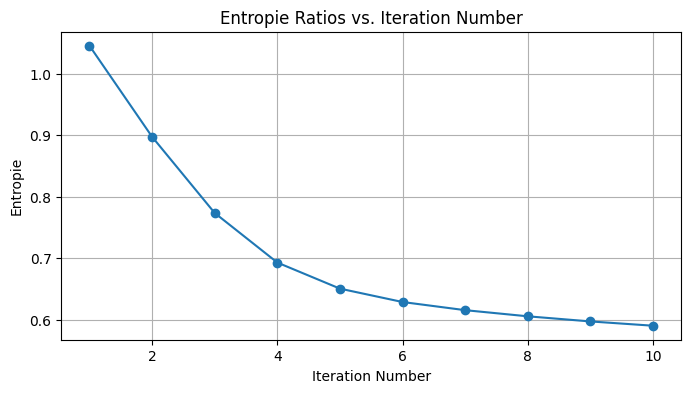

In [24]:

entrp_ratios = flvq.entrp
num_iterations = [i for i in range(1, len(entrp_ratios)+1)]

plt.figure(figsize=(8, 4))
plt.plot(num_iterations, entrp_ratios, marker='o')
plt.title('Entropie Ratios vs. Iteration Number')
plt.xlabel('Iteration Number')
plt.ylabel('Entropie')
plt.grid(True)

plt.show()

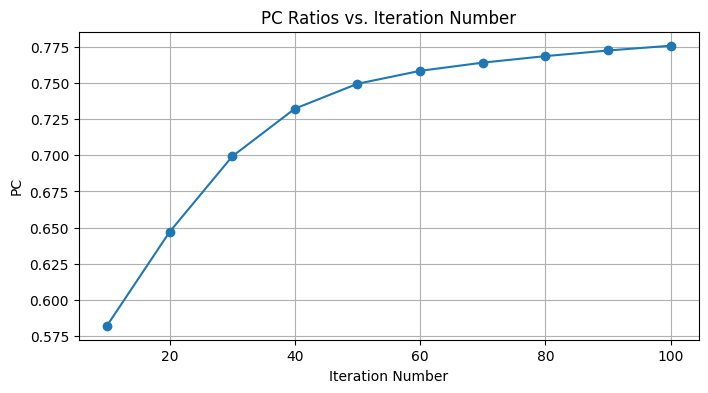

In [25]:

pc_ratios = flvq.pc
num_iterations = [i*10 for i in range(1, len(pc_ratios)+1)]

plt.figure(figsize=(8, 4))
plt.plot(num_iterations, pc_ratios, marker='o')
plt.title('PC Ratios vs. Iteration Number')
plt.xlabel('Iteration Number')
plt.ylabel('PC')
plt.grid(True)

plt.show()

Confusion Matrix:
[[50  0  0]
 [ 0 49  1]
 [ 0 16 34]]


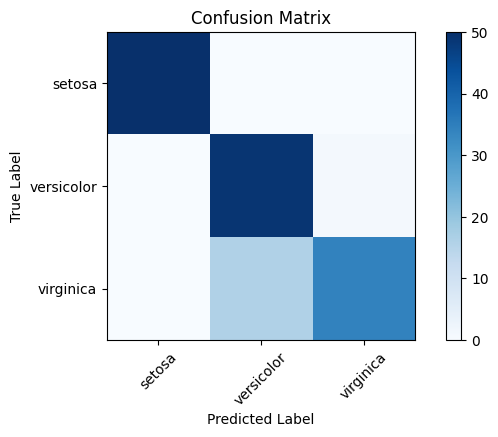

In [26]:
from sklearn.metrics import confusion_matrix
import numpy as np

flvq_predictions = np.array(flvq.pred(X))  
class_labels = ['setosa', 'versicolor', 'virginica']

conf_matrix = confusion_matrix(Y, flvq_predictions)

print('Confusion Matrix:')
print(conf_matrix)



plt.figure(figsize=(8, 4))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks(np.arange(len(class_labels)), class_labels, rotation=45)
plt.yticks(np.arange(len(class_labels)), class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


### 4. Performance Comparaison

In [27]:
fcm = FCM(X,3,2,10)
fcmV_initiale = fcm.V
fcm.entrainer(X,Y)

lvq = LVQ(X,3,10,0.01)
V_initiale = lvq.V.copy()
lvq.ajuster(X,Y)

flvq = FLVQ(X,3,2,10,0.01)
FV_initiale = flvq.V.copy()
flvq.ajuster(X,Y)

#### Error Ratio

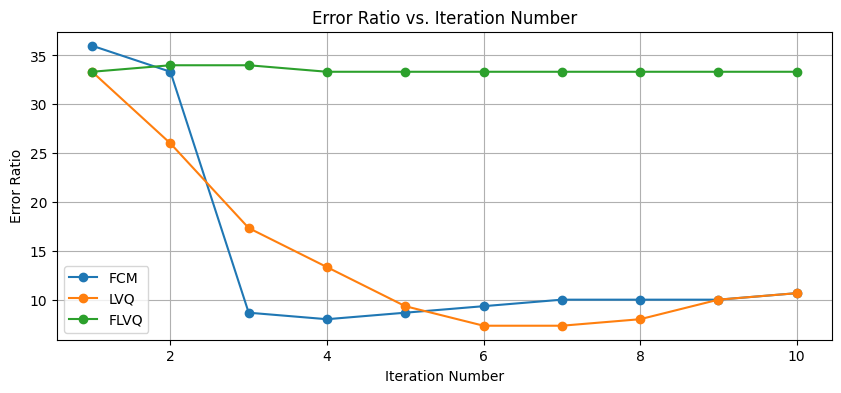

In [28]:
import matplotlib.pyplot as plt

error_1 = fcm.t_er
error_2 = lvq.t_er
error_3 = flvq.t_er
num_iterations = [i for i in range(1, len(error_1) +1)]

plt.figure(figsize=(10, 4))
plt.plot(num_iterations, error_1, marker='o',label = "FCM")
plt.plot(num_iterations, error_2, marker='o',label = "LVQ")
plt.plot(num_iterations, error_3, marker='o',label = "FLVQ")
plt.legend()
plt.title('Error Ratio vs. Iteration Number')
plt.xlabel('Iteration Number')
plt.ylabel('Error Ratio')
plt.grid(True)

plt.show()

#### Entropie

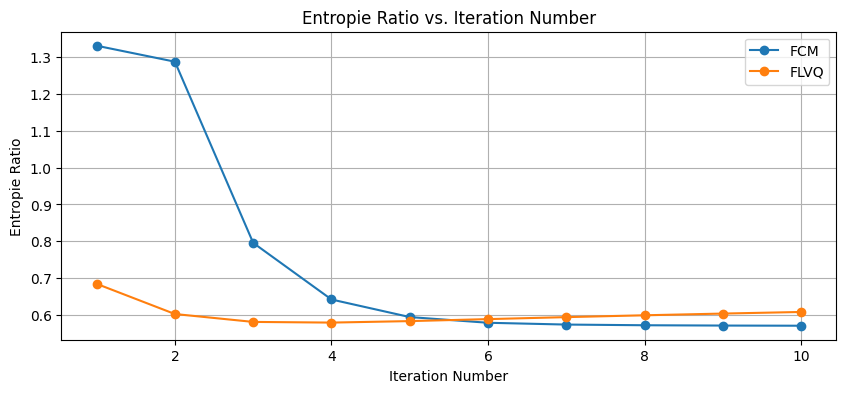

In [29]:
import matplotlib.pyplot as plt

line_1 = fcm.entrp
line_3 = flvq.entrp
num_iterations = [i for i in range(1, len(line_1) +1)]

plt.figure(figsize=(10, 4))
plt.plot(num_iterations, line_1, marker='o',label = "FCM")
plt.plot(num_iterations, line_3, marker='o',label = "FLVQ")
plt.legend()
plt.title('Entropie Ratio vs. Iteration Number')
plt.xlabel('Iteration Number')
plt.ylabel('Entropie Ratio')
plt.grid(True)

plt.show()

#### PC

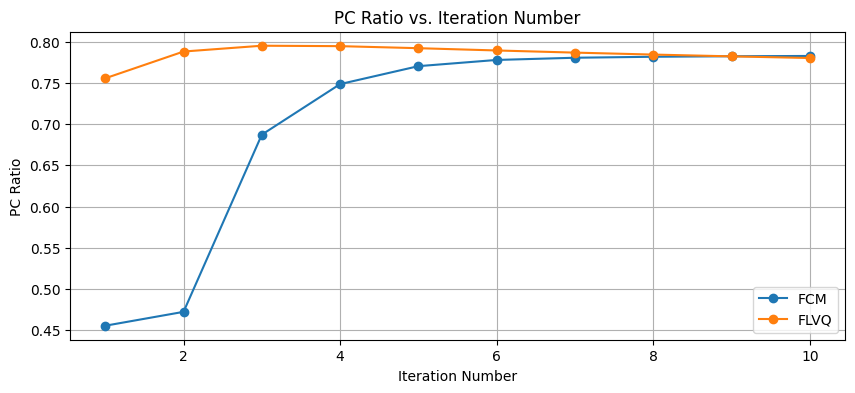

In [30]:
import matplotlib.pyplot as plt

line_1 = fcm.pc
line_3 = flvq.pc
num_iterations = [i for i in range(1, len(line_1) +1)]

plt.figure(figsize=(10, 4))
plt.plot(num_iterations, line_1, marker='o',label = "FCM")
plt.plot(num_iterations, line_3, marker='o',label = "FLVQ")
plt.legend()
plt.title('PC Ratio vs. Iteration Number')
plt.xlabel('Iteration Number')
plt.ylabel('PC Ratio')
plt.grid(True)

plt.show()

#### Accuracy

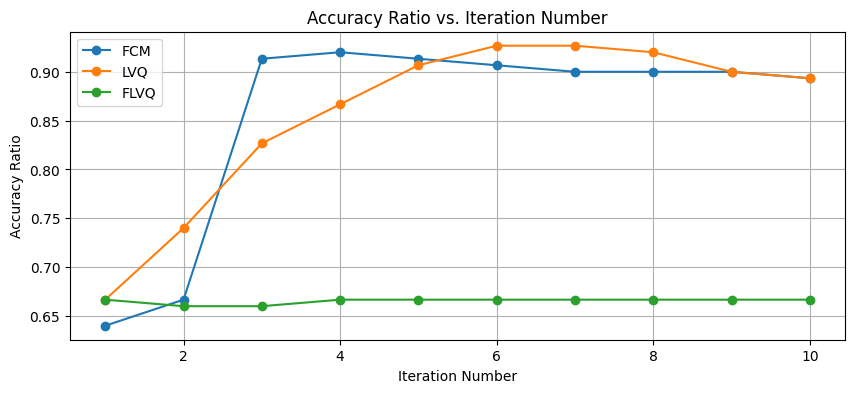

In [31]:
import matplotlib.pyplot as plt

error_1 = fcm.accr
error_2 = lvq.accr
error_3 = flvq.accr
num_iterations = [i for i in range(1, len(error_1) +1)]

plt.figure(figsize=(10, 4))
plt.plot(num_iterations, error_1, marker='o',label = "FCM")
plt.plot(num_iterations, error_2, marker='o',label = "LVQ")
plt.plot(num_iterations, error_3, marker='o',label = "FLVQ")
plt.legend()
plt.title('Accuracy Ratio vs. Iteration Number')
plt.xlabel('Iteration Number')
plt.ylabel('Accuracy Ratio')
plt.grid(True)

plt.show()

In [32]:
from sklearn.metrics import  confusion_matrix


def perforamnce(Y,y_pred,titre):
    print("*************** ",titre," ***************")
    cm = confusion_matrix(Y, y_pred)
    print("Confusion matrix:\n", cm)

y_pred = [fcm.pred(X),lvq.pred(X),flvq.pred(X)]
titre = ['fcm','lvq','flvq']
for i in range(3):
    perforamnce(Y,y_pred[i],titre[i])

***************  fcm  ***************
Confusion matrix:
 [[50  0  0]
 [ 0 47  3]
 [ 0 13 37]]
***************  lvq  ***************
Confusion matrix:
 [[50  0  0]
 [ 0 47  3]
 [ 0 13 37]]
***************  flvq  ***************
Confusion matrix:
 [[50  0  0]
 [ 3  0 47]
 [ 0  0 50]]


```python
Conclusion
```

In this report, we compared the performance of FCM , LVQ and FLVQ clustering algorithms on the Iris dataset. All algorithms provided good separation between the classes, with slightly different approaches to clustering. We hope this report provides insight into the strengths and weaknesses of these popular clustering methods.